### Starting point
- Map size is 50 by 50 rectangular grid.
- Villager and Hunter are at origin. Monster will appear in random position.  

### Basic stats
- All Villager, Monster and Hunter will perform random walk inside the map at first at a speed of 1 unit-length per move.  
- They all have 2 unit-lengths of vision distance.  
- Monster and Hunter have 1 unit-length of attack range and Hunter will always win against Monster.  
- They have different agilities: Villager moves the first, Monster the second, and Hunter moves last.  

### Rules of motion upon encounter
- Upon encounter, characters are allowed to move in diagonals.
- Villager will escape from Monster.  
- Monster will chase the closer one of both Villager and Hunter. 
- Once Monster hunts down the target it will continue random walk.  
- Hunter will chase and hunt Monster.  
- The motion will end when Monster is eliminated or the movement limit is reached.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Character:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        self.path_x = [x]
        self.path_y = [y]
        self.alive = True

    def move(self, dx, dy):
        self.x += dx
        self.y += dy
        self.path_x.append(self.x)
        self.path_y.append(self.y)

    def random_move(self, x_min, x_max, y_min, y_max, movement):
        while True:
            dx, dy = movement[np.random.choice(np.arange(4))]
            new_x, new_y = self.x + dx, self.y + dy
            if x_min <= new_x <= x_max and y_min <= new_y <= y_max:
                self.move(dx, dy)
                break

    def distance_to(self, other):
        return abs(self.x - other.x) + abs(self.y - other.y)

def motion_simulation(num_steps, chars, current_map):
    # Get map size
    hor, ver = zip(*current_map)
    x_min, x_max = min(hor), max(hor)
    y_min, y_max = min(ver), max(ver)

    # Setting up initial conditions
    villager = Character()
    hunter   = Character()
    monster  = Character(np.random.randint(x_min, x_max), np.random.randint(y_min, y_max))

    v_agil = chars['villager']['agility']
    h_agil = chars['hunter']['agility']
    m_agil = chars['monster']['agility']
    agilities = sorted([v_agil, h_agil, m_agil])

    # v_attack = chars['villager']['attack']
    h_attack = chars['hunter']['attack']
    m_attack = chars['monster']['attack']

    v_vision = chars['villager']['vision']
    h_vision = chars['hunter']['vision']
    m_vision = chars['monster']['vision']

    v_movement = chars['villager']['movement']
    h_movement = chars['hunter']['movement']
    m_movement = chars['monster']['movement']

    for step in range(num_steps):
        for i in agilities:
            # Villager's move
            if i == v_agil and villager.alive:
                if villager.distance_to(monster) <= v_vision:
                    dx = -1 if villager.x < monster.x else 1
                    dy = -1 if villager.y < monster.y else 1
                    villager.move(dx, dy)
                else:
                    villager.random_move(x_min, x_max, y_min, y_max, v_movement)

            # Hunter's move
            if i == h_agil and hunter.alive:
                if hunter.distance_to(monster) <= h_vision:
                    dx = 1 if hunter.x < monster.x else -1
                    dy = 1 if hunter.y < monster.y else -1
                    hunter.move(dx, dy)
                else:
                    hunter.random_move(x_min, x_max, y_min, y_max, h_movement)

            # Monster's move
            if i == m_agil and monster.alive:
                target = villager if villager.distance_to(monster) < hunter.distance_to(monster) and villager.alive else hunter
                if monster.distance_to(target) <= m_vision:
                    dx = 1 if hunter.x < monster.x else -1
                    dy = 1 if hunter.y < monster.y else -1
                    monster.move(dx, dy)
                else:
                    monster.random_move(x_min, x_max, y_min, y_max, m_movement)

        # Check villager alive
        if villager.distance_to(monster) <= m_attack and villager.alive:
            villager.alive = False
            print(f"Villager eliminated at step {step+1}")

        # Check for end conditions
        if hunter.distance_to(monster) <= h_attack:
            monster.alive = False
            print(f"Monster eliminated at step {step+1}")
            break

    return villager, hunter, monster

Monster eliminated at step 932


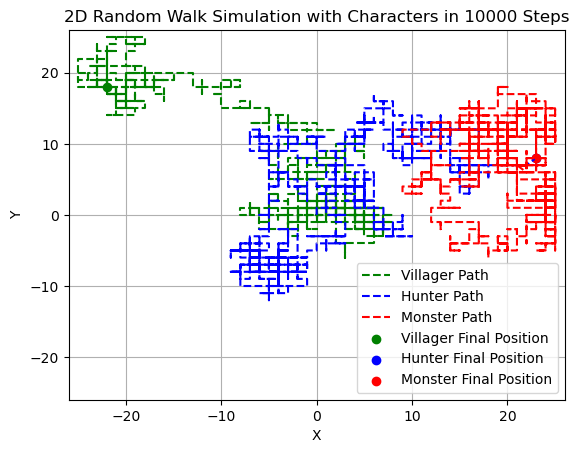

In [3]:
villager = {
    'agility' : 0,
    'vision'  : 2,
    'attack'  : None,
    'movement': np.array([(0, 1), (0, -1), (1, 0), (-1, 0)])
}

monster = {
    'agility' : 1,
    'vision'  : 2,
    'attack'  : 1,
    'movement': np.array([(0, 1), (0, -1), (1, 0), (-1, 0)])
}

hunter = {
    'agility' : 2,
    'vision'  : 2,
    'attack'  : 1,
    'movement': np.array([(0, 1), (0, -1), (1, 0), (-1, 0)])
}

characters = {
    'villager': villager,
    'monster' : monster,
    'hunter'  : hunter
}

current_map = np.array([
    (-25, 25) , (25, 25),
    (-25, -25), (25, -25)
]) # Rectangle map with integer vertices

steps = 10000

villager, hunter, monster = motion_simulation(steps, characters, current_map)

# Plotting the paths
plt.plot(villager.path_x, villager.path_y, 'g--', label='Villager Path')
plt.plot(hunter.path_x, hunter.path_y,'b--', label='Hunter Path')
plt.plot(monster.path_x, monster.path_y, 'r--', label='Monster Path')

# Mark the final positions
plt.scatter(villager.path_x[-1], villager.path_y[-1], c='green', marker='o', label='Villager Final Position')
plt.scatter(hunter.path_x[-1], hunter.path_y[-1], c='blue', marker='o', label='Hunter Final Position')
plt.scatter(monster.path_x[-1], monster.path_y[-1], c='red', marker='o', label='Monster Final Position')

plt.xlim(min(current_map[:, 0])-1, max(current_map[:, 0]+1))
plt.ylim(min(current_map[:, 1])-1, max(current_map[:, 1]+1))
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'2D Random Walk Simulation with Characters in {steps} Steps')
plt.grid(True)
plt.legend()
plt.show()

### Ideas to be implemented:
- ~~Different stats for each character.~~  
- Different numbers of characters and more character types.  
- Irregular map shape and non-integer diagonal movements.  
- Map is the surface of a sphere (no boundaries and object moving towards one direction will return to its origin position).
- Map has shelters/obstacles and limited amount of resources instead of using movement limit.
- (Some) resources are renewable.
